In [1]:
# 1.  Data Cleaning.
# 1.1 Import Libraries we could need / Notation for Pandas Setting / Load the 3 Datasets.

    # Manipulating Data
import pandas as pd
import numpy as np

    # Visualizing Data
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from matplotlib_venn import venn2

    # Statistical Analysis
from scipy.stats import (
    ttest_ind,
    chi2_contingency,
    norm,
    mannwhitneyu,
    shapiro,
    probplot
)
from statsmodels.stats.proportion import (
    proportions_ztest,
    proportions_chisquare
)
import statsmodels.api as sm

import sys
sys.path.append("../src")

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# 1.2 df_clients cleaning
    # Load the dataset
df_final_demo = pd.read_csv('../data/raw_data_txt/df_final_demo.txt', sep=',')
    # Cleaning / Fix: Shape, Head, Info and Dtype of df_final_demo (Client Profile). 
print(f"Shape: {df_final_demo.shape[0]} rows × {df_final_demo.shape[1]} columns\nHead:\n{df_final_demo.head(3)}")
print("Info:") 
{df_final_demo.info()}

Shape: 70609 rows × 9 columns
Head:
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976            6.00             73.00     60.50     U       2.00   
1    2304905            7.00             94.00     58.00     U       2.00   
2    1439522            5.00             64.00     32.00     U       2.00   

        bal  calls_6_mnth  logons_6_mnth  
0  45105.30          6.00           9.00  
1 110860.30          6.00           9.00  
2  52467.79          6.00           9.00  
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  f

{None}

In [3]:
    # The names are not descriptive enough, this violates clean code practices, so lets change w/ dictionary.
df_final_demo.rename(
    columns={
        'clnt_tenure_yr': 'client_tenure_years',
        'clnt_tenure_mnth':'client_tenure_months',
        "clnt_age": "age",
        "gendr": "gender",
        "num_accts": "number_of_accounts",
        "bal": "balance",
        'calls_6_mnth': 'calls_6_months',
        'logons_6_mnth' : 'logons_6_months',
    },
    inplace=True)

    # client_id should be an string as we won't be doing calculations with it.
df_final_demo['client_id'] = df_final_demo['client_id'].astype(str)

In [4]:
    # Check for Nulls, Uniques and Duplicates in numerical and categorical columns.
print(f"\n.) Numerical Columns: {df_final_demo.select_dtypes(include=['number']).columns.tolist()}\n\n.) Nulls for Numerical Columns:\n{df_final_demo.select_dtypes(include=['number']).isnull().sum()}\n\n.) Duplicate rows for Numerical: {df_final_demo.select_dtypes(include=['number']).duplicated().sum()} \n\n.) Uniques For Numerical Columns:\n{df_final_demo.select_dtypes(include=['number']).nunique().sort_values(ascending=False)}\n\n.] Categorical Columns: {df_final_demo.select_dtypes(include=['object']).columns.tolist()}\n\n.] Nulls for Categorical Columns:\n{df_final_demo.select_dtypes(include=['object']).isnull().sum()}\n\n.] Duplicate rows for Categorical: {df_final_demo.select_dtypes(include=['object']).duplicated().sum()}\n\n.] Uniques For Categorical Columns:\n{df_final_demo.select_dtypes(include=['object']).nunique().sort_values(ascending=False)}")


.) Numerical Columns: ['client_tenure_years', 'client_tenure_months', 'age', 'number_of_accounts', 'balance', 'calls_6_months', 'logons_6_months']

.) Nulls for Numerical Columns:
client_tenure_years     14
client_tenure_months    14
age                     15
number_of_accounts      14
balance                 14
calls_6_months          14
logons_6_months         14
dtype: int64

.) Duplicate rows for Numerical: 16 

.) Uniques For Numerical Columns:
balance                 70328
client_tenure_months      482
age                       165
client_tenure_years        54
logons_6_months             9
number_of_accounts          8
calls_6_months              8
dtype: int64

.] Categorical Columns: ['client_id', 'gender']

.] Nulls for Categorical Columns:
client_id     0
gender       14
dtype: int64

.] Duplicate rows for Categorical: 0

.] Uniques For Categorical Columns:
client_id    70609
gender           4
dtype: int64


In [5]:
    # Replace numerical NaNs with median.
df_final_demo[df_final_demo.select_dtypes(include='number').columns] = df_final_demo.select_dtypes(include='number').fillna(df_final_demo.median(numeric_only=True)) 

In [6]:
    # For categoricals, gender we have 14 Nan and 4 unique values: U, M, F, X. 
df_final_demo['gender'].value_counts(dropna=False)

gender
U      24122
M      23724
F      22746
NaN       14
X          3
Name: count, dtype: int64

In [7]:
    # Replace categorical NaNs with mode (U).
df_final_demo['gender'] = df_final_demo['gender'].fillna(df_final_demo['gender'].mode()[0])
    # Normalize X to U.
df_final_demo['gender'] = df_final_demo['gender'].replace('X', 'U')

In [8]:
    # Age and balance are ok to be floats, but the rest should be integers.
df_final_demo = df_final_demo.astype({
    'client_tenure_years': 'int64',
    'client_tenure_months': 'int64',
    'number_of_accounts': 'int64',
    'calls_6_months': 'int64',
    'logons_6_months': 'int64'
})

In [9]:
    # Get df_clients clean.
df_clients = df_final_demo

In [10]:
    # Final check.
print(f"Shape: {df_clients.shape[0]} rows × {df_clients.shape[1]} columns\nHead:\n{df_clients.head(3)}")
print("Info:") 
{df_clients.info()}
print(f"\n.) Numerical Columns: {df_clients.select_dtypes(include=['number']).columns.tolist()}\n\n.) Nulls for Numerical Columns:\n{df_clients.select_dtypes(include=['number']).isnull().sum()}\n\n.) Duplicate rows for Numerical: {df_clients.select_dtypes(include=['number']).duplicated().sum()} \n\n.) Uniques For Numerical Columns:\n{df_clients.select_dtypes(include=['number']).nunique().sort_values(ascending=False)}\n\n.] Categorical Columns: {df_clients.select_dtypes(include=['object']).columns.tolist()}\n\n.] Nulls for Categorical Columns:\n{df_clients.select_dtypes(include=['object']).isnull().sum()}\n\n.] Duplicate rows for Categorical: {df_clients.select_dtypes(include=['object']).duplicated().sum()}\n\n.] Uniques For Categorical Columns:\n{df_clients.select_dtypes(include=['object']).nunique().sort_values(ascending=False)}")

Shape: 70609 rows × 9 columns
Head:
  client_id  client_tenure_years  client_tenure_months   age gender  \
0    836976                    6                    73 60.50      U   
1   2304905                    7                    94 58.00      U   
2   1439522                    5                    64 32.00      U   

   number_of_accounts   balance  calls_6_months  logons_6_months  
0                   2  45105.30               6                9  
1                   2 110860.30               6                9  
2                   2  52467.79               6                9  
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             70609 non-null  object 
 1   client_tenure_years   70609 non-null  int64  
 2   client_tenure_months  70609 non-null  int64  
 3   age                   70609 non-null 

In [11]:
    # Describe for Numerical Columns.
df_clients.describe()

,client_tenure_years,client_tenure_months,age,number_of_accounts,balance,calls_6_months,logons_6_months
count,70609.00,70609.00,70609.00,70609.00,70609.00,70609.00,70609.00
mean,12.05,150.66,46.44,2.26,147428.56,3.38,5.57
std,6.87,82.08,15.59,0.53,301481.14,2.24,2.35
min,2.00,33.00,13.50,1.00,13789.42,0.00,1.00
25%,6.00,82.00,32.50,2.00,37350.12,1.00,4.00
50%,11.00,136.00,47.00,2.00,63332.90,3.00,5.00
75%,16.00,192.00,59.00,2.00,137521.72,6.00,7.00
max,62.00,749.00,96.00,8.00,16320040.15,7.00,9.00


<style>
.markdown-text {
  font-family: 'Your Font', monospace;
  color: black;
}
</style>

<div class="markdown-text">
  The average client has 12 years at vanguard, 46 yrs old, have 2 accounts with 147.428,00 usd is the average balance. This cleaned df_clients dataset is need it for demographics questions of Day 1 wrap.
</div>

In [12]:
# Save df_clients as pkl file for preserve all the cleaning process (more Mb of space in the repo) or do a function so it can call final_demo_txt and clean like this. 
# function name in src folder is function_df_clients_load.py your call it like this:
import sys
sys.path.append("../src")
from function_df_clients_load import load_and_clean_df_clients
df_clients = load_and_clean_df_clients('../data/raw_data_txt/df_final_demo.txt')
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             70609 non-null  object 
 1   client_tenure_years   70609 non-null  int64  
 2   client_tenure_months  70609 non-null  int64  
 3   age                   70609 non-null  float64
 4   gender                70609 non-null  object 
 5   number_of_accounts    70609 non-null  int64  
 6   balance               70609 non-null  float64
 7   calls_6_months        70609 non-null  int64  
 8   logons_6_months       70609 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 4.8+ MB


In [13]:
# 1.3 df_logs 
    # Load the dataset
df_web_1 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_1.txt', sep=',')
df_web_2 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_2.txt', sep=',')

    # Merge Logs.
df_logs = pd.concat([df_web_1, df_web_2])

    # Cleaning / Fix: Shape, Head and Dtype of Web Data (Web Activity Logs)
print(f"Shape: {df_logs.shape[0]} rows × {df_logs.shape[1]} columns\nHead:\n{df_logs.head(3)}")
print("Info:") 
{df_logs.info()}

Shape: 755405 rows × 5 columns
Head:
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  2017-04-17 15:27:07  
1  2017-04-17 15:26:51  
2  2017-04-17 15:19:22  
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


{None}

In [14]:
    # client_id should be an string as we won't be doing calculations with it. Columns name seems ok.
df_logs.client_id = df_logs.client_id.astype(str)
    # date_time should be a time object.
df_logs.date_time = df_logs.date_time.astype('datetime64[ns]')

In [15]:
    # Check for Nulls.
print (df_logs.isnull().sum())
    # Check for Duplicates Rows.
print (df_logs.duplicated().sum())

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
10764


In [16]:
    # Drop Duplicated rows, since are useless.
df_logs = df_logs.drop_duplicates()

In [17]:
    # Check for unique client_ids.
df_logs.client_id.nunique()

120157

<style>
.markdown-text {
  font-family: 'Your Font', monospace;
  color: black;
}
</style>

<div class="markdown-text">
  So we cleaned df_clients and have the demographics for 70.609 unique clients, here are 120.157 so later we need to have just the rows common for this through client_id column. This is a log of all the traffic, visitors and clients both inside or outside the experiment.
</div>

In [18]:
    # Create a funtion too for this.
import sys
sys.path.append("../src")
from function_df_logs_load import clean_df_logs
df_web_1 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_1.txt', sep=',')
df_web_2 = pd.read_csv('../data/raw_data_txt/df_final_web_data_pt_2.txt', sep=',')

df_logs = clean_df_logs(pd.concat([df_web_1, df_web_2]))
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744641 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     744641 non-null  object        
 1   visitor_id    744641 non-null  object        
 2   visit_id      744641 non-null  object        
 3   process_step  744641 non-null  object        
 4   date_time     744641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 34.1+ MB


In [19]:
    # Pick 3 Random Clients with visit_id to understand de data.
random_visit_ids = df_logs.visit_id.sample(3)
experiment = df_logs[df_logs.visit_id.isin(random_visit_ids)].sort_values(by='date_time', ascending=True)
experiment

,client_id,visitor_id,visit_id,process_step,date_time
243230,1316243,509332228_4735676248,801100403_13405187279_544354,start,2017-04-14 15:40:38
243229,1316243,509332228_4735676248,801100403_13405187279_544354,step_1,2017-04-14 15:40:58
243228,1316243,509332228_4735676248,801100403_13405187279_544354,step_2,2017-04-14 15:41:24
243227,1316243,509332228_4735676248,801100403_13405187279_544354,step_3,2017-04-14 15:42:52
243226,1316243,509332228_4735676248,801100403_13405187279_544354,confirm,2017-04-14 15:43:18
243225,1316243,509332228_4735676248,801100403_13405187279_544354,confirm,2017-04-14 15:45:02
39481,2612987,906038500_16156403983,948223758_86221904809_849533,start,2017-04-20 14:50:38
39480,2612987,906038500_16156403983,948223758_86221904809_849533,step_1,2017-04-20 14:50:41
242883,2558274,671404795_66151551729,146511148_77319783835_607833,start,2017-05-25 13:02:57
242882,2558274,671404795_66151551729,146511148_77319783835_607833,step_1,2017-05-25 13:03:06


<style>
.markdown-text {
  font-family: 'Your Font', monospace;
  color: black;
}
</style>

<div class="markdown-text">
  So we asume that client_id trigger the funnel step at the date_time, we treat this as:

time between start and step_1 ==> entry latency or initial engagement time.

time between step_1 and step_2 ==> step_1 time  

time between step_2 and step_3 ==> step_2 time

time between step_3 and confirm ==> step_3 time and dwell or time spent before final confirmation

So the real time of step_3 is not possible to know, and is estimated as step_3 to confirm, since it should be some time of final engagement like happened in start to step_1. Confirm has no duration. 
</div>

In [20]:
# 1.4 df_groups
    # Load the data  
df_groups = pd.read_csv('../data/raw_data_txt/df_final_experiment_clients.txt', sep=',')

# Cleaning / Fix: Shape, Head and Dtype of Experiment (Test/Control Assignments).
print(f"Shape: {df_groups.shape[0]} rows × {df_groups.shape[1]} columns\nHead:\n{df_groups.head(3)}")
print("Info:") 
{df_groups.info()}

Shape: 70609 rows × 2 columns
Head:
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


{None}

In [21]:
    # Variation should be in lower case for consistency.
df_groups.columns = df_groups.columns.map(str.lower)
    # client_id should be an string as we won't be doing calculations with it.
df_groups.client_id = df_groups.client_id.astype(str)

In [22]:
    # Check for Nulls, Duplicates and Uniques
print (df_groups.isnull().sum())
print (df_groups.duplicated().sum())
print (df_groups.client_id.nunique())

client_id        0
variation    20109
dtype: int64
0
70609


In [23]:
    # We have 20.109 clients that are not either test or control in the experiment, drop.
df_groups = df_groups.dropna()
    # Check for Nulls again
print (df_groups.isnull().sum())

client_id    0
variation    0
dtype: int64


In [24]:
    # Uniques for client_id. with test or control.
df_groups.client_id.nunique()

50500

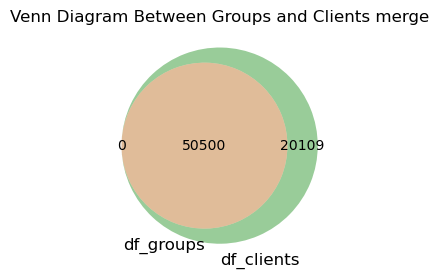

In [25]:
# 1.5 Create df_full just with clients control and test in the experiment dates.
    # First merging df_groups and df_clients, to get the unique clients with test or control and demographics.
df_clients_full = pd.merge(df_groups, df_clients, how='left', on='client_id')
    # Plot Venn diagram of this merge to check if they are the same, since venn 2 uses set not concat pandas logic.

df_groups['client_id'] = df_final_demo['client_id'].astype(str).str.strip()
df_clients['client_id'] = df_clients['client_id'].astype(str).str.strip()
clients_in_groups = set(df_groups.client_id)
clients_in_clients = set(df_clients.client_id)
plt.figure(figsize=(5, 3))
venn2([clients_in_groups, clients_in_clients], set_labels=('df_groups', 'df_clients'))
plt.title('Venn Diagram Between Groups and Clients merge')
plt.show()

In [26]:
    # So according to venn diagram 0 clients in df_groups are not in df_clients. 20.109 clients only appear in df_clients but not in df_groups, since we drop the control and test there, and the common cliends_ids between the 2 are 50500 clients.
    # Check for duplicates in merged dataset.
df_clients_full.client_id.nunique()

50500

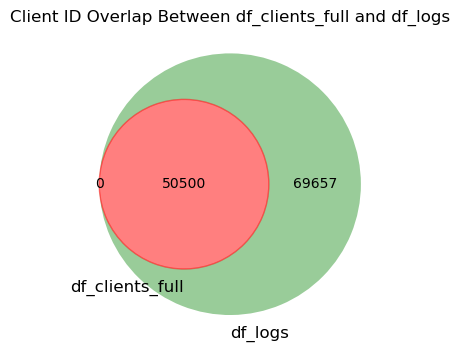

In [27]:
# 1.5 Create df_full just with clients control and test in the experiment dates.
    # Merge
df_full = pd.merge(
    df_logs,
    df_clients_full,
    on='client_id',
    how='inner'
)
    # Venn
df_clients_full['client_id'] = df_clients_full['client_id'].astype(str).str.strip()
df_logs['client_id'] = df_logs['client_id'].astype(str).str.strip()

# Create sets
clients_in_full = set(df_clients_full['client_id'])
clients_in_logs = set(df_logs['client_id'])

# Plot Venn diagram
plt.figure(figsize=(6, 4))
venn = venn2([clients_in_full, clients_in_logs], set_labels=('df_clients_full', 'df_logs'))

# Optional: highlight overlap
venn.get_patch_by_id('11').set_color('red')
venn.get_patch_by_id('11').set_alpha(0.5)

plt.title('Client ID Overlap Between df_clients_full and df_logs')
plt.show()


In [28]:
   # So according to venn diagram we have our 50.500 unique clients with control or test label with their full log history.69.657 clients only appear in df_logs but not in df_clients_full.
    # Check for uniques in merged dataset.
df_full.client_id.nunique()

50500

In [29]:
    # Check for dates in merged dataset.
df_full.date_time.min(), df_full.date_time.max()

(Timestamp('2017-03-15 00:19:28'), Timestamp('2017-06-20 23:57:06'))

In [30]:
    # Dates are inside the experiment dates.
    # Lets check if the size of samples are appropiatte, how many clients as control and test
df_full.groupby('variation').client_id.nunique()

variation
Control    23532
Test       26968
Name: client_id, dtype: int64

In [31]:
    # Check for balance and fair of the samplings, and if the assigments were done randomly. Like 50/50 chance for any random client to be control or test.   

chi2_contingency([[23532, 26968]])

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[23532., 26968.]]))

In [34]:
# Categorical: gender
gender_table = pd.crosstab(df_clients_full['variation'], df_clients_full['gender'])
gender_stat, gender_p, _, _ = chi2_contingency(gender_table)

# Numeric: age
control_age = df_clients_full[df_clients_full['variation'] == 'Control']['age']
test_age = df_clients_full[df_clients_full['variation'] == 'Test']['age']
age_stat, age_p = ttest_ind(control_age, test_age, equal_var=False)

# Categorical: balance
balance_table = pd.crosstab(df_clients_full['variation'], df_clients_full['balance'])
balance_stat, balance_p, _, _ = chi2_contingency(balance_table)

# Print results
print(f"Gender balance p-value: {gender_p:.4f}")
print(f"Age balance p-value: {age_p:.4f}")
print(f"Balance balance p-value: {balance_p:.4f}")

Gender balance p-value: 0.3857
Age balance p-value: 0.0157
Balance balance p-value: 0.4958


In [35]:
    # Seems ok and experimental groups are statistically fair and well-randomized . Now save df_full in pkl file 
df_full.to_pickle('../data/clean_data_txt/df_full.pkl')